In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, datediff, to_date, avg, count
import json
import matplotlib.pyplot as plt
import numpy as np

spark = SparkSession.builder \
    .appName("MySparkApp") \
    .getOrCreate()


25/03/29 20:42:36 WARN Utils: Your hostname, ana resolves to a loopback address: 127.0.1.1; using 192.168.110.240 instead (on interface wlo1)
25/03/29 20:42:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/29 20:42:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/03/29 20:42:39 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
from pyspark.sql.functions import explode

# cargamos los jsons de las categorias con multiline = true ya que los jsons tienen más de una línea
data_set_categories_MX = spark.read.option("multiline", "true").json("hdfs://localhost:9000/user/hadoop/ana/datasets/MX_category_id.json")
data_set_categories_BR = spark.read.option("multiline", "true").json("hdfs://localhost:9000/user/hadoop/ana/datasets/BR_category_id.json")
data_set_categories_US = spark.read.option("multiline", "true").json("hdfs://localhost:9000/user/hadoop/ana/datasets/US_category_id.json")

# Veamos el esquema de uno de los dataframes
data_set_categories_MX.printSchema()

# Ahora queremos nada mas las columnas id y title, que es la información que nos interesa

# Las columnas id y title están en formato de array, debemos aplanarlas para que sean valores individuales
data_set_categories_MX = data_set_categories_MX.select(explode(col("items")).alias("item")) \
	.select(col("item.id").alias("category_id"), col("item.snippet.title").alias("category_name"))
data_set_categories_BR = data_set_categories_BR.select(explode(col("items")).alias("item")) \
	.select(col("item.id").alias("category_id"), col("item.snippet.title").alias("category_name"))
data_set_categories_US = data_set_categories_US.select(explode(col("items")).alias("item")) \
	.select(col("item.id").alias("category_id"), col("item.snippet.title").alias("category_name"))

# Ahora queremos ver los primeros 5 registros de cada dataframe
data_set_categories_MX.show(5)
data_set_categories_BR.show(5)
data_set_categories_US.show(5)

root
 |-- etag: string (nullable = true)
 |-- items: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- etag: string (nullable = true)
 |    |    |-- id: string (nullable = true)
 |    |    |-- kind: string (nullable = true)
 |    |    |-- snippet: struct (nullable = true)
 |    |    |    |-- assignable: boolean (nullable = true)
 |    |    |    |-- channelId: string (nullable = true)
 |    |    |    |-- title: string (nullable = true)
 |-- kind: string (nullable = true)

+-----------+----------------+
|category_id|   category_name|
+-----------+----------------+
|          1|Film & Animation|
|          2|Autos & Vehicles|
|         10|           Music|
|         15|  Pets & Animals|
|         17|          Sports|
+-----------+----------------+
only showing top 5 rows

+-----------+----------------+
|category_id|   category_name|
+-----------+----------------+
|          1|Film & Animation|
|          2|Autos & Vehicles|
|         10|           Musi

In [3]:
# cargamos el dataset modificado de MX
data_set_MX = spark.read.csv("hdfs://localhost:9000/user/hadoop/ana/datasets/MX.csv", header=True)
# contar el numero de registros
print("Numero de registros en MX: ", data_set_MX.count())
# Vemos el esquema del dataframe
data_set_MX.printSchema()

Numero de registros en MX:  268598
root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publishedAt: string (nullable = true)
 |-- channelId: string (nullable = true)
 |-- channelTitle: string (nullable = true)
 |-- categoryId: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)



In [4]:
# cargamos el dataset modificado de BR
data_set_BR = spark.read.csv("hdfs://localhost:9000/user/hadoop/ana/datasets/BR.csv", header=True)
# contar el numero de registros
print("Numero de registros en BR: ", data_set_BR.count())
# Vemos el esquema del dataframe
data_set_BR.printSchema()

Numero de registros en BR:  268790
root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publishedAt: string (nullable = true)
 |-- channelId: string (nullable = true)
 |-- channelTitle: string (nullable = true)
 |-- categoryId: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)



In [5]:
# cargamos el dataset modificado de US
data_set_US = spark.read.csv("hdfs://localhost:9000/user/hadoop/ana/datasets/US.csv", header=True)
# contar el numero de registros
print("Numero de registros en US: ", data_set_US.count())
# Vemos el esquema del dataframe
data_set_US.printSchema()

Numero de registros en US:  268787
root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publishedAt: string (nullable = true)
 |-- channelId: string (nullable = true)
 |-- channelTitle: string (nullable = true)
 |-- categoryId: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)



# Versión DataFrames

In [6]:
# MEXICO
# Crear una nueva columna con la diferencia de días entre trending_date y publishedAt
data_set_with_diff_MX = data_set_MX.withColumn(
    "diff_days", datediff(to_date(col("trending_date")), to_date(col("publishedAt")))
)

# Calcular el número de videos y el promedio de días a tendencia por categoría
resultMX = data_set_with_diff_MX.groupBy("categoryId").agg(
    count("video_id").alias("number_videos"),
    avg("diff_days").alias("promedio_diff_dias_a_tendencia")
)


resultMX = resultMX.orderBy("categoryId")
resultMX.show(truncate=False, n=100)


# Unir el dataframe de categorías con el resultado
resultMX = resultMX.join(data_set_categories_MX, resultMX.categoryId == data_set_categories_MX.category_id).drop("category_id")
resultMX = resultMX.select("categoryId", "category_name", "number_videos", "promedio_diff_dias_a_tendencia")
resultMX = resultMX.orderBy(col("categoryId").cast("int"))

resultMX.show(truncate=False, n=100)


+----------+-------------+------------------------------+
|categoryId|number_videos|promedio_diff_dias_a_tendencia|
+----------+-------------+------------------------------+
|1         |7229         |6.055056024346382             |
|10        |61626        |5.990783111024568             |
|15        |156          |6.455128205128205             |
|17        |25385        |5.067086862320268             |
|19        |1640         |5.517682926829268             |
|2         |2488         |5.616961414790997             |
|20        |42128        |5.888720091150779             |
|22        |33959        |5.893135840277982             |
|23        |9665         |5.635695809622349             |
|24        |63158        |5.7662845561924065            |
|25        |10307        |5.302803919666246             |
|26        |6642         |5.760614272809395             |
|27        |1941         |6.049459041731066             |
|28        |2099         |5.851834206765126             |
|29        |17

+----------+--------------------+-------------+------------------------------+
|categoryId|category_name       |number_videos|promedio_diff_dias_a_tendencia|
+----------+--------------------+-------------+------------------------------+
|1         |Film & Animation    |7229         |6.055056024346382             |
|2         |Autos & Vehicles    |2488         |5.616961414790997             |
|10        |Music               |61626        |5.990783111024568             |
|15        |Pets & Animals      |156          |6.455128205128205             |
|17        |Sports              |25385        |5.067086862320268             |
|19        |Travel & Events     |1640         |5.517682926829268             |
|20        |Gaming              |42128        |5.888720091150779             |
|22        |People & Blogs      |33959        |5.893135840277982             |
|23        |Comedy              |9665         |5.635695809622349             |
|24        |Entertainment       |63158        |5.766

In [7]:
# BRASIL
# Crear una nueva columna con la diferencia de días entre trending_date y publishedAt
data_set_with_diff_BR = data_set_BR.withColumn(
    "diff_days", datediff(to_date(col("trending_date")), to_date(col("publishedAt")))
)

# Calcular el número de videos y el promedio de días a tendencia por categoría
resultBR = data_set_with_diff_BR.groupBy("categoryId").agg(
    count("video_id").alias("number_videos"),
    avg("diff_days").alias("promedio_diff_dias_a_tendencia")
)

resultBR = resultBR.orderBy("categoryId")
resultBR.show(truncate=False, n=100)

# Unir el dataframe de categorías con el resultado
resultBR = resultBR.join(data_set_categories_BR, resultBR.categoryId == data_set_categories_BR.category_id).drop("category_id")
resultBR = resultBR.select("categoryId", "category_name", "number_videos", "promedio_diff_dias_a_tendencia")
resultBR = resultBR.orderBy(col("categoryId").cast("int"))

resultBR.show(truncate=False, n=100)


+----------+-------------+------------------------------+
|categoryId|number_videos|promedio_diff_dias_a_tendencia|
+----------+-------------+------------------------------+
|1         |3329         |5.092520276359267             |
|10        |58413        |5.187372673891086             |
|15        |323          |4.501547987616099             |
|17        |40716        |4.2722025739267115            |
|19        |1403         |5.100498930862438             |
|2         |2603         |5.1344602381867075            |
|20        |40437        |4.708929940401118             |
|22        |32594        |4.900349757624102             |
|23        |10380        |4.869749518304432             |
|24        |64925        |4.703273007316134             |
|25        |4588         |4.838491717523976             |
|26        |2026         |5.17324777887463              |
|27        |3150         |4.6946031746031744            |
|28        |3835         |4.876923076923077             |
|29        |68

In [8]:
# ESTADOS UNIDOS
# Crear una nueva columna con la diferencia de días entre trending_date y publishedAt
data_set_with_diff_US = data_set_US.withColumn(
    "diff_days", datediff(to_date(col("trending_date")), to_date(col("publishedAt")))
)

# Calcular el número de videos y el promedio de días a tendencia por categoría
resultUS = data_set_with_diff_US.groupBy("categoryId").agg(
    count("video_id").alias("number_videos"),
    avg("diff_days").alias("promedio_diff_dias_a_tendencia")
)

resultUS = resultUS.orderBy("categoryId")
resultUS.show(truncate=False, n=100)

# Unir el dataframe de categorías con el resultado
resultUS = resultUS.join(data_set_categories_US, resultUS.categoryId == data_set_categories_US.category_id).drop("category_id")
resultUS = resultUS.select("categoryId", "category_name", "number_videos", "promedio_diff_dias_a_tendencia")
resultUS = resultUS.orderBy(col("categoryId").cast("int"))

resultUS.show(truncate=False, n=100)


+----------+-------------+------------------------------+
|categoryId|number_videos|promedio_diff_dias_a_tendencia|
+----------+-------------+------------------------------+
|1         |10923        |4.126613567701181             |
|10        |43398        |4.201576109498133             |
|15        |1222         |4.195581014729951             |
|17        |31327        |4.039295176684649             |
|19        |1713         |3.9859894921190895            |
|2         |5492         |3.8923889293517844            |
|20        |53242        |3.9522933022801547            |
|22        |22653        |4.138392265925043             |
|23        |13183        |4.17947356443905              |
|24        |53934        |4.41489598398042              |
|25        |9669         |4.5924087289275               |
|26        |7100         |4.075633802816902             |
|27        |6655         |4.07152516904583              |
|28        |8156         |4.03077488965179              |
|29        |12

In [9]:
# Convertir los resultados a Pandas para poder graficar los resultados
resultMXPandas = resultMX.toPandas()
resultBRPandas = resultBR.toPandas()
resultUSPandas = resultUS.toPandas()

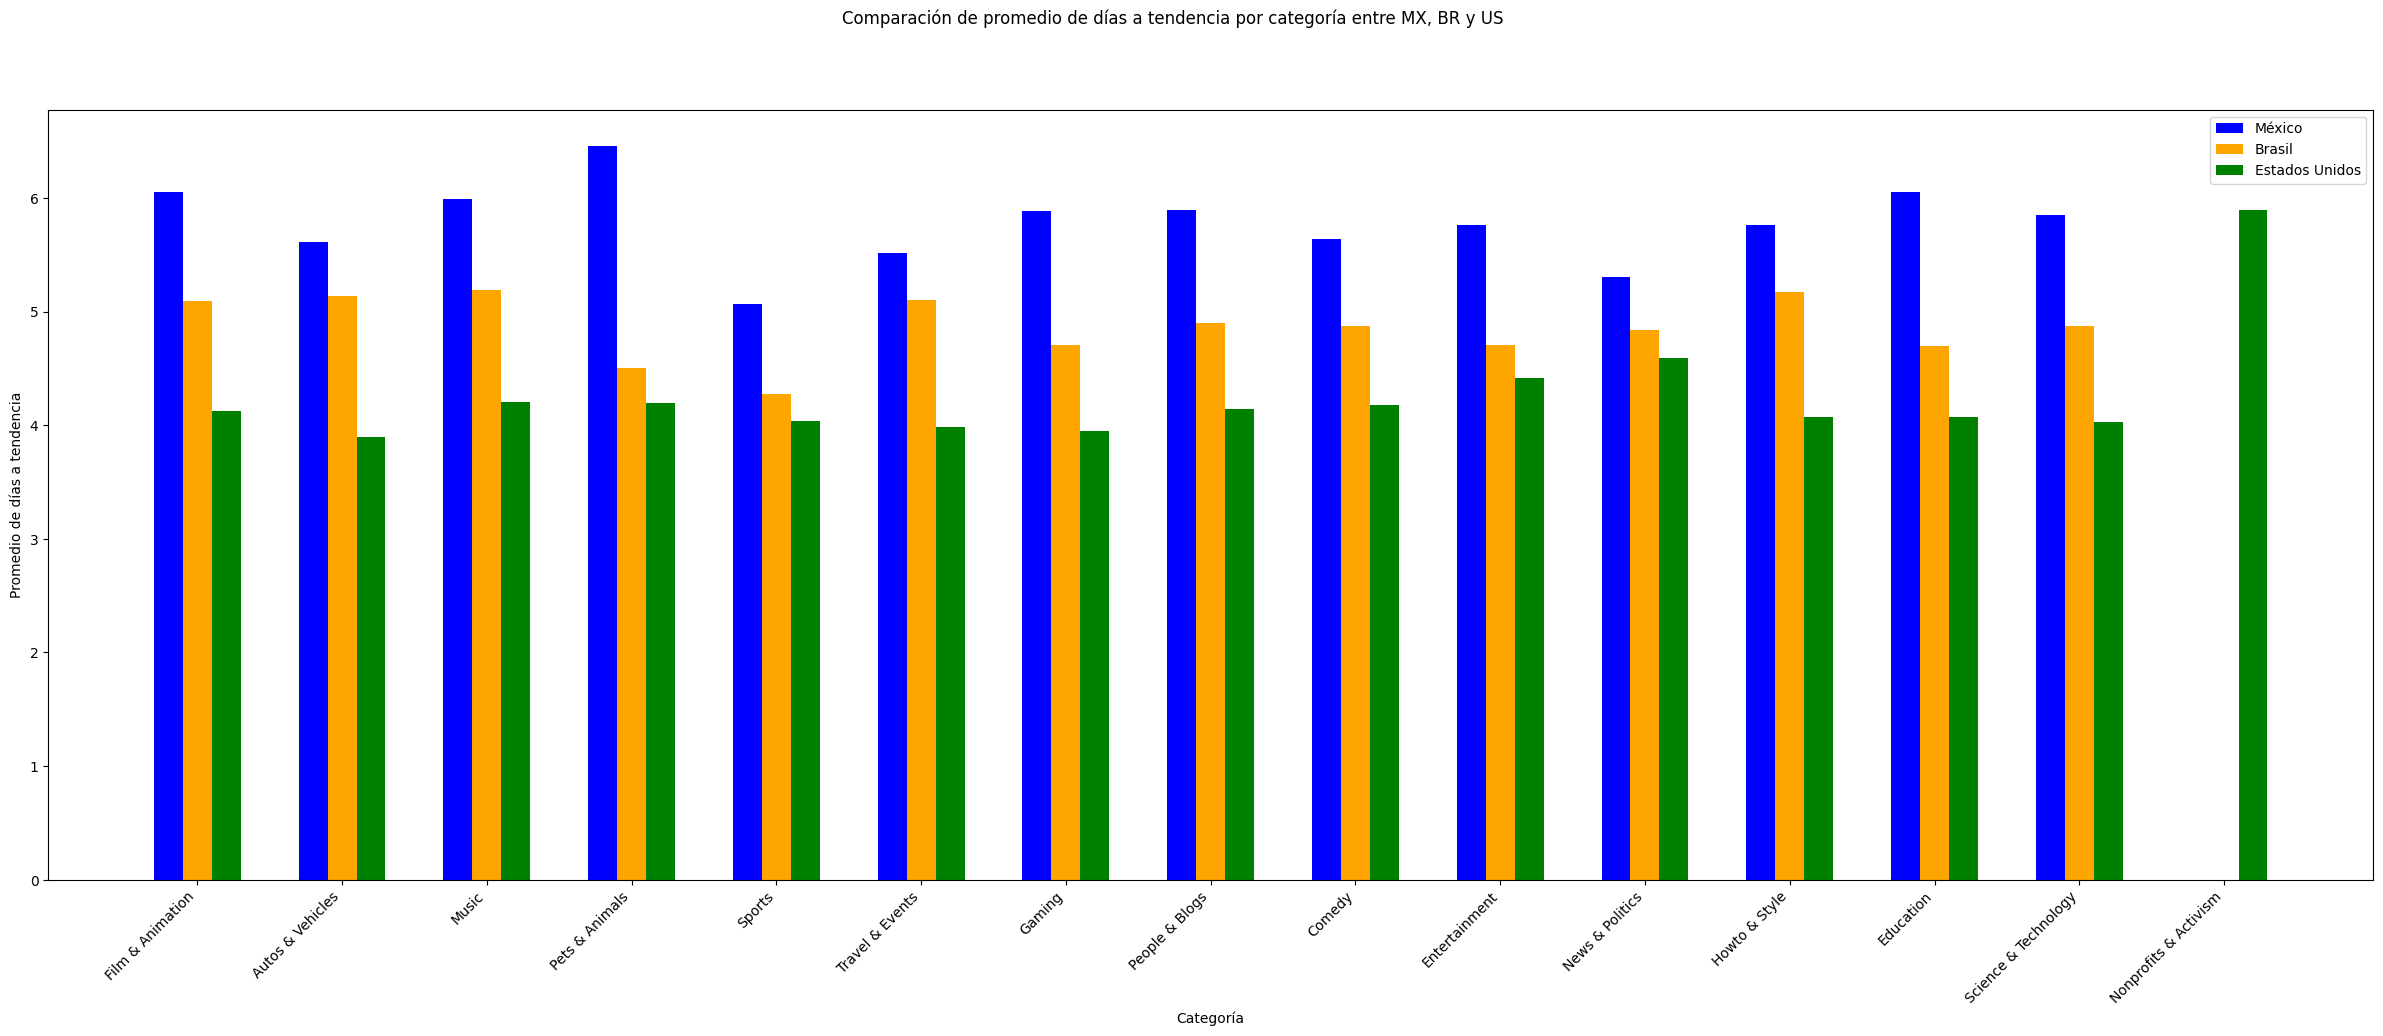

In [10]:
# Graficar el promedio de días a tendencia por categoría en MX, BR y US

# Ancho de las barras
width = 0.2

fig, axs = plt.subplots(1, 1, figsize=(30, 10))
fig.suptitle("Comparación de promedio de días a tendencia por categoría entre MX, BR y US")

categoriesMXAligned = resultMXPandas["category_name"].unique()
categoriesBRAligned = resultBRPandas["category_name"].unique()
categoriesUSAligned = resultUSPandas["category_name"].unique()

xMX = np.arange(len(categoriesMXAligned))
xBR = np.arange(len(categoriesBRAligned))
xUS = np.arange(len(categoriesUSAligned))

axs.bar(xMX - width, resultMXPandas["promedio_diff_dias_a_tendencia"], width, color="blue", label="México")
axs.bar(xBR, resultBRPandas["promedio_diff_dias_a_tendencia"], width, color="orange", label="Brasil")
axs.bar(xUS + width, resultUSPandas["promedio_diff_dias_a_tendencia"], width, color="green", label="Estados Unidos")
axs.set_xticks(np.arange(max(len(categoriesMXAligned), len(categoriesBRAligned), len(categoriesUSAligned))))
axs.set_xticklabels(categoriesUSAligned, rotation=45, ha="right")
axs.set_ylabel("Promedio de días a tendencia")
axs.set_xlabel("Categoría")
axs.legend()

# Versión SQL

In [11]:
# Registrar el DataFrame como una vista temporal
data_set_MX.createOrReplaceTempView("data_set_MX")
data_set_categories_MX.createOrReplaceTempView("data_set_categories_MX")

queryMX = """
WITH diferencia_dias_a_tendencia (video_id, categoryId, diff_days) AS (
    SELECT video_id, categoryId, DATEDIFF(TO_DATE(trending_date), TO_DATE(publishedAt))
    FROM data_set_MX
)
SELECT 
    d.categoryId, 
    c.category_name, 
    COUNT(d.video_id) AS number_videos, 
    AVG(d.diff_days) AS promedio_diff_dias_a_tendencia
FROM diferencia_dias_a_tendencia d
JOIN data_set_categories_MX c
ON d.categoryId = c.category_id
GROUP BY d.categoryId, c.category_name
ORDER BY CAST(d.categoryId AS INT);
"""

# Ejecuta la consulta SQL
resultSQLMX = spark.sql(queryMX)

# Muestra el resultado
resultSQLMX.show()



+----------+--------------------+-------------+------------------------------+
|categoryId|       category_name|number_videos|promedio_diff_dias_a_tendencia|
+----------+--------------------+-------------+------------------------------+
|         1|    Film & Animation|         7229|             6.055056024346382|
|         2|    Autos & Vehicles|         2488|             5.616961414790997|
|        10|               Music|        61626|             5.990783111024568|
|        15|      Pets & Animals|          156|             6.455128205128205|
|        17|              Sports|        25385|             5.067086862320268|
|        19|     Travel & Events|         1640|             5.517682926829268|
|        20|              Gaming|        42128|             5.888720091150779|
|        22|      People & Blogs|        33959|             5.893135840277982|
|        23|              Comedy|         9665|             5.635695809622349|
|        24|       Entertainment|        63158|     

In [12]:
# Registrar el DataFrame como una vista temporal
data_set_BR.createOrReplaceTempView("data_set_BR")
data_set_categories_BR.createOrReplaceTempView("data_set_categories_BR")

queryBR = """
WITH diferencia_dias_a_tendencia (video_id, categoryId, diff_days) AS (
    SELECT video_id, categoryId, DATEDIFF(TO_DATE(trending_date), TO_DATE(publishedAt))
    FROM data_set_BR
)
SELECT 
    d.categoryId, 
    c.category_name, 
    COUNT(d.video_id) AS number_videos, 
    AVG(d.diff_days) AS promedio_diff_dias_a_tendencia
FROM diferencia_dias_a_tendencia d
JOIN data_set_categories_BR c
ON d.categoryId = c.category_id
GROUP BY d.categoryId, c.category_name
ORDER BY CAST(d.categoryId AS INT);
"""

# Ejecuta la consulta SQL
resultSQLBR = spark.sql(queryBR)

# Muestra el resultado
resultSQLBR.show()



+----------+--------------------+-------------+------------------------------+
|categoryId|       category_name|number_videos|promedio_diff_dias_a_tendencia|
+----------+--------------------+-------------+------------------------------+
|         1|    Film & Animation|         3329|             5.092520276359267|
|         2|    Autos & Vehicles|         2603|            5.1344602381867075|
|        10|               Music|        58413|             5.187372673891086|
|        15|      Pets & Animals|          323|             4.501547987616099|
|        17|              Sports|        40716|            4.2722025739267115|
|        19|     Travel & Events|         1403|             5.100498930862438|
|        20|              Gaming|        40437|             4.708929940401118|
|        22|      People & Blogs|        32594|             4.900349757624102|
|        23|              Comedy|        10380|             4.869749518304432|
|        24|       Entertainment|        64925|     

In [13]:
# Registrar el DataFrame como una vista temporal
data_set_US.createOrReplaceTempView("data_set_US")
data_set_categories_US.createOrReplaceTempView("data_set_categories_US")

queryUS = """
WITH diferencia_dias_a_tendencia (video_id, categoryId, diff_days) AS (
    SELECT video_id, categoryId, DATEDIFF(TO_DATE(trending_date), TO_DATE(publishedAt))
    FROM data_set_US
)
SELECT 
    d.categoryId, 
    c.category_name, 
    COUNT(d.video_id) AS number_videos, 
    AVG(d.diff_days) AS promedio_diff_dias_a_tendencia
FROM diferencia_dias_a_tendencia d
JOIN data_set_categories_US c
ON d.categoryId = c.category_id
GROUP BY d.categoryId, c.category_name
ORDER BY CAST(d.categoryId AS INT);
"""

# Ejecuta la consulta SQL
resultSQLUS = spark.sql(queryUS)

# Muestra el resultado
resultSQLUS.show()



+----------+--------------------+-------------+------------------------------+
|categoryId|       category_name|number_videos|promedio_diff_dias_a_tendencia|
+----------+--------------------+-------------+------------------------------+
|         1|    Film & Animation|        10923|             4.126613567701181|
|         2|    Autos & Vehicles|         5492|            3.8923889293517844|
|        10|               Music|        43398|             4.201576109498133|
|        15|      Pets & Animals|         1222|             4.195581014729951|
|        17|              Sports|        31327|             4.039295176684649|
|        19|     Travel & Events|         1713|            3.9859894921190895|
|        20|              Gaming|        53242|            3.9522933022801547|
|        22|      People & Blogs|        22653|             4.138392265925043|
|        23|              Comedy|        13183|              4.17947356443905|
|        24|       Entertainment|        53934|     